<a href="https://colab.research.google.com/github/Manoj-312002/Python/blob/master/Titanic/seaborn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn-dark')

In [8]:
%cd /content
!git clone https://github.com/Manoj-312002/Python.git 
%cd Python/Titanic

/content
fatal: destination path 'Python' already exists and is not an empty directory.
/content/Python/Titanic


In [9]:
train = pd.read_csv('train-data.csv')
train.head()
test = pd.read_csv('test-data.csv')
alldata = pd.concat([train,test])
len(train),len(test),len(alldata)

(891, 418, 1309)

In [10]:
alldata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [11]:
train[train['Age'].isna()]
s = train.groupby(['Sex'])
s.describe()

PassengerId                          ...  Fare                 
             count        mean         std  ...   50%    75%       max
Sex                                         ...                       
female       314.0  431.028662  256.846324  ...  23.0  55.00  512.3292
male         577.0  454.147314  257.486139  ...  10.5  26.55  512.3292

[2 rows x 56 columns]

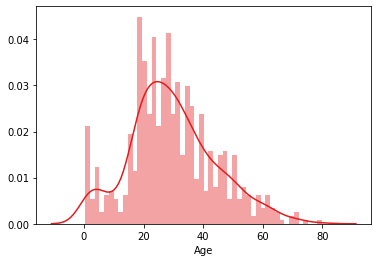

In [12]:
sns.set_palette('Set1')
sns.distplot(train['Age'],bins=50)  

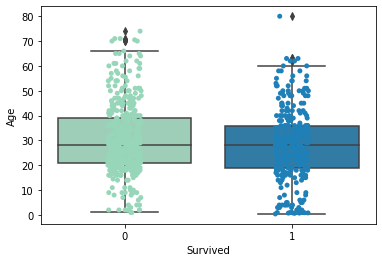

In [13]:
sns.stripplot('Survived','Age',data=train,palette='YlGnBu')
sns.boxplot('Survived','Age',data = train,palette='YlGnBu')


In [14]:
train['Pclass'].unique()

array([3, 1, 2])

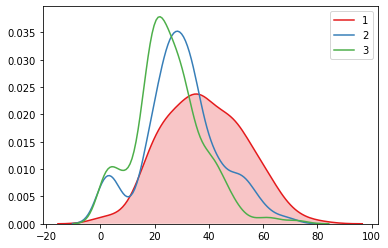

In [15]:
plt.figure()
sns.kdeplot(train.query('Pclass == 1')['Age'],label='1',shade=True)
sns.kdeplot(train.query('Pclass == 2')['Age'],label='2')
sns.kdeplot(train.query('Pclass == 3')['Age'],label='3')


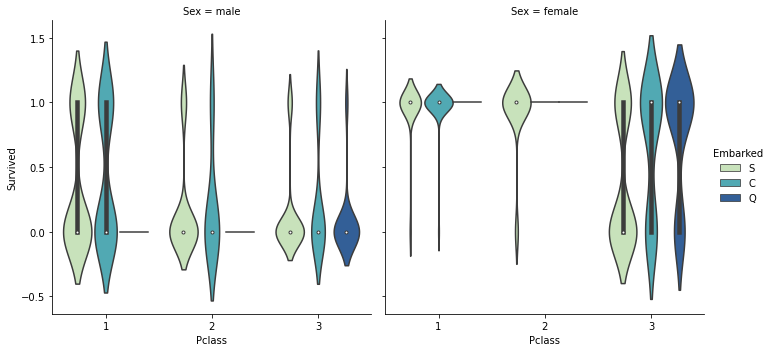

In [16]:
sns.catplot(x='Pclass',y='Survived',hue='Embarked',data=train,kind='violin',col='Sex',palette='YlGnBu')

In [17]:
for i in train.columns:
    print(i,'->',train[i].unique().shape)

PassengerId -> (891,)
Survived -> (2,)
Pclass -> (3,)
Name -> (891,)
Sex -> (2,)
Age -> (89,)
SibSp -> (7,)
Parch -> (7,)
Ticket -> (681,)
Fare -> (248,)
Cabin -> (148,)
Embarked -> (4,)


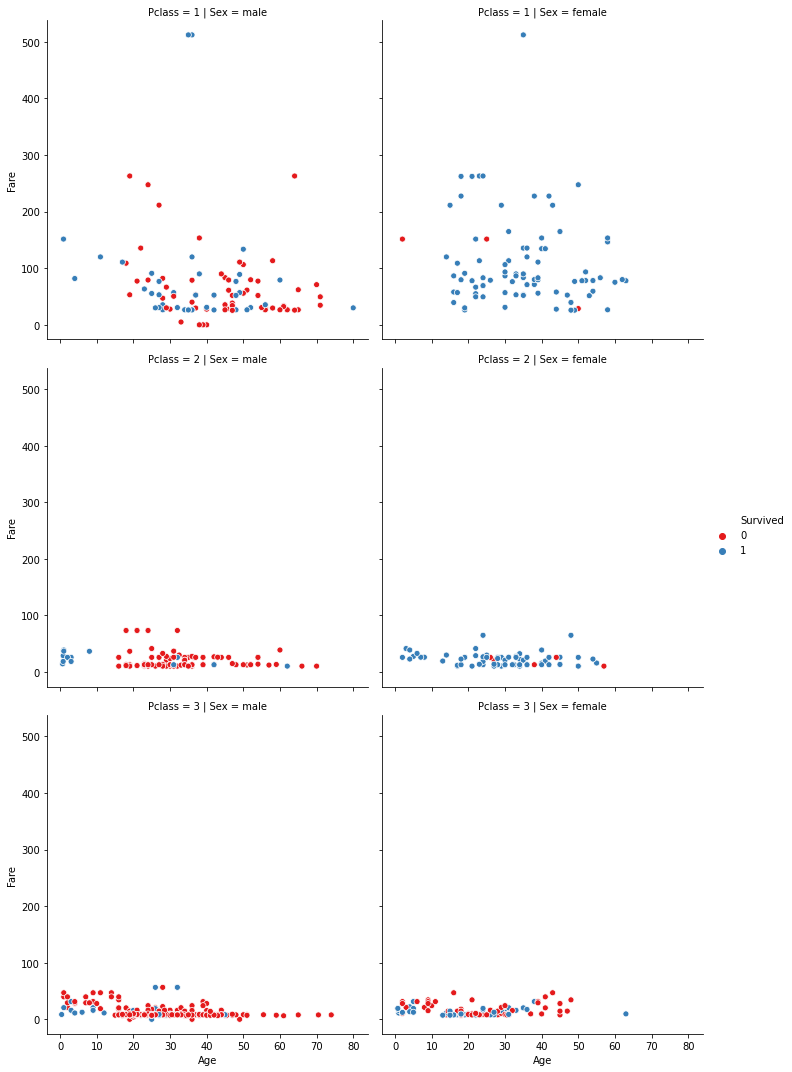

In [18]:
sns.relplot(x='Age',y='Fare',kind='scatter',data=train,col='Sex',estimator=None,row='Pclass',hue='Survived')

## Important

In [20]:
train['Title'] = train['Name'].str.split(',', expand = True)[1].str.split('.', expand = True)[0].str.strip(' ')
train.groupby(['Sex','Pclass'])['Age'].apply(lambda x:x.fillna(x.median()))

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    21.5
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64